In [4]:
import zipfile

zip_path = r"C:\Users\user\Desktop\ML projects\archive.zip"
extract_path = r"C:\Users\user\Desktop\ML projects"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Unzipped successfully!")


KeyboardInterrupt: 

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [ ]:
#normalizing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)


In [9]:
#generator
train_data = train_datagen.flow_from_directory(
    r"C:\Users\user\Desktop\ML projects\dataset\training_set",
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

val_data = val_datagen.flow_from_directory(
    r"C:\Users\user\Desktop\ML projects\dataset\test_set",
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [13]:
#making cnn model
model = Sequential()
model.add(Conv2D(32,(3,3),padding='valid',activation='relu',input_shape = (224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))



C:\Users\user\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,177,281 (42.64 MB)

 Trainable params: 11,177,281 (42.64 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [18]:
history = model.fit(train_data,epochs=10,validation_data=val_data)
history

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 710s 3s/step - accuracy: 0.5702 - loss: 0.6862 - val_accuracy: 0.6175 - val_loss: 0.6727
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 407s 2s/step - accuracy: 0.6561 - loss: 0.6232 - val_accuracy: 0.7115 - val_loss: 0.5675
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1062s 4s/step - accuracy: 0.7079 - loss: 0.5678 - val_accuracy: 0.7105 - val_loss: 0.5445
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 364s 1s/step - accuracy: 0.7426 - loss: 0.5220 - val_accuracy: 0.7650 - val_loss: 0.4910
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 360s 1s/step - accuracy: 0.7558 - loss: 0.4958 - val_accuracy: 0.7840 - val_loss: 0.4583
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 348s 1s/step - accuracy: 0.7815 - loss: 0.4675 - val_accuracy: 0.7920 - val_loss: 0.4489
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 366s 1s/step - accuracy: 0.7906 - loss: 0.4500 - val_accuracy: 0.8065 - val_loss: 0.4430
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 454s 2s/step - accuracy: 0.8006 - loss: 0.4284 - val_acc

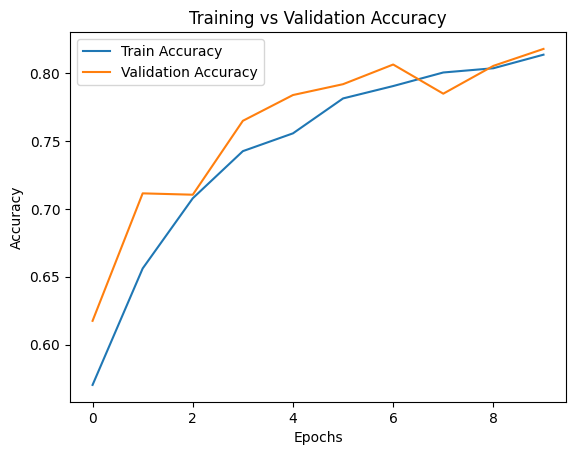

In [34]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


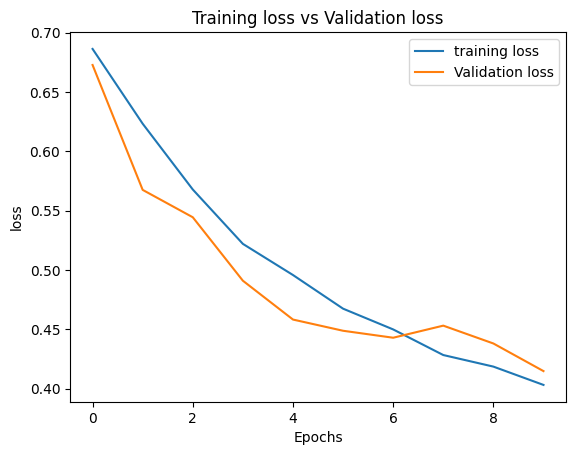

In [35]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='Validation loss')

plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.title('Training loss vs Validation loss')
plt.show()

#### prediction part


In [26]:
from tensorflow.keras.preprocessing import image
import numpy as np

# 1. Load image
img_path = r"C:\Users\user\Desktop\ML projects\dataset\single_prediction\cat_or_dog_2.jpg"
img = image.load_img(img_path, target_size=(224, 224))

# 2. Convert to array
img_array = image.img_to_array(img)

# 3. Normalize (same as training)
img_array = img_array / 255.0

# 4. Add batch dimension
img_array = np.expand_dims(img_array, axis=0)

# 5. Predict
prediction = model.predict(img_array)

# 6. Interpret result
if prediction[0][0] > 0.5:
    print("It is a Dog 🐶")
else:
    print("It is a Cat 🐱")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
It is a Cat 🐱


In [28]:
img_array.shape

(1, 224, 224, 3)

In [31]:
#predict for multiple images
test_data = val_datagen.flow_from_directory(
    r"C:\Users\user\Desktop\ML projects\dataset\dataset",
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

pred_probs = model.predict(test_data)
pred_classes = (pred_probs > 0.5).astype(int)


Found 10002 images belonging to 3 classes.
  9/313 ━━━━━━━━━━━━━━━━━━━━ 2:58 589ms/step

KeyboardInterrupt: 

#### we can increase accuracy also using batchnorm and dropout but i am leaving it here cuz i have a CPU based system and its taking alottttttt timeee in training so am leaving it here